## Observations and Insights 

In [34]:
# Three Observations and Inferences from the Data
# 1. Capomoulin and ramicane are likely the safest treatment options with low mean rates of tumors and low standard deviations compared to the other treatments.
# 2. The mice were basically 50-50 in male/female ratio with a few more male mice.
# 3. With capomoulin treatment, the tumor volume rapidly decreased looking at the line plot with mouse s185.



In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_dataset = pd.merge(mouse_metadata, study_results, how = "inner", on="Mouse ID")
combined_dataset
# Display the data table for preview
combined_dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [36]:
# Checking the number of mice.
mice_total = combined_dataset["Mouse ID"].count()
mice_total

1893

In [37]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_dataset[combined_dataset.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [38]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_dataset.loc[combined_dataset["Mouse ID"]=='g989']
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_mice_total_df = duplicate_mice_df.loc[duplicate_mice_df['Mouse ID'] != 'g989']

In [40]:
# Checking the number of mice in the clean DataFrame.
print(f"the original total of mice is: {combined_dataset['Mouse ID'].nunique()}")

len(new_mice_total_df["Mouse ID"].unique())

the original total of mice is: 249


0

## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summarytable_df = combined_dataset.groupby(["Drug Regimen"])
mean_data = summarytable_df["Tumor Volume (mm3)"].mean()
median_data = summarytable_df["Tumor Volume (mm3)"].median()
variance_data = summarytable_df["Tumor Volume (mm3)"].var()
standard_dev_data = summarytable_df["Tumor Volume (mm3)"].std()
error_data = summarytable_df["Tumor Volume (mm3)"].sem()
summary_stats = pd.DataFrame({"Mean": mean_data, "Median": median_data, "Variance": variance_data, "StDev": standard_dev_data, "SEM": error_data})
summary_stats


,Mean,Median,Variance,StDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

# summary_stats_agg_table = combined_dataset.groupby("Drug Regimen").agg({("Tumor Volume (mm3)"):["Mean",
#                                                     "Median", "Variance","StDev","SEM"]}).describe()
# summary_stats_agg_table

means = combined_dataset.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = combined_dataset.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = combined_dataset.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standards = combined_dataset.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = combined_dataset.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

newtable = pd.DataFrame(means)
newtable2 = newtable.rename(columns={"Tumor Volume (mm3)": "Mean"})

newtable2["Median"] = medians
newtable2["Variance"] = variances
newtable2["std"] = standards
newtable2["sem"] = sems

newtable2

,Mean,Median,Variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

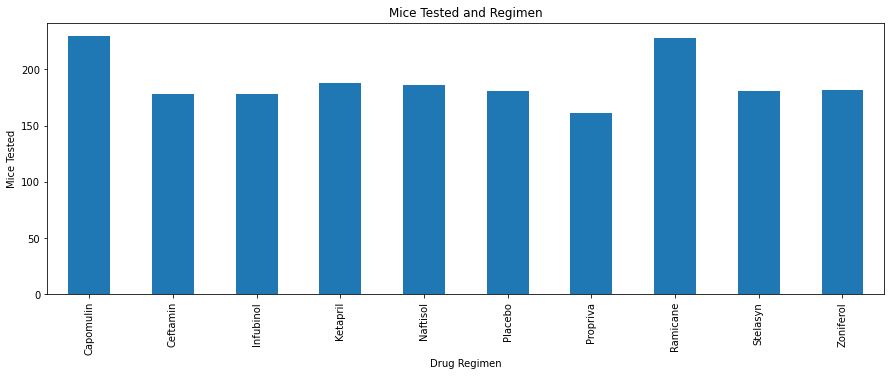

<Figure size 432x288 with 0 Axes>

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_drugregimen = combined_dataset.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_drugregimen.plot(kind="bar", figsize=(15,5))
plt.title("Mice Tested and Regimen")
plt.ylabel("Mice Tested")

plt.show()
plt.tight_layout()

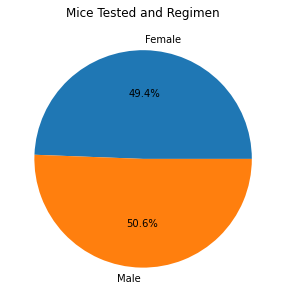

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
malefemale_distribution = combined_dataset.groupby(["Sex"]).count()["Mouse ID"]
malefemale_distribution.plot(kind = "pie", y = "Mouse ID", figsize=(15,5), autopct = "%1.1f%%")
plt.ylabel("")
plt.title("Mice Tested and Regimen")
plt.show()


In [45]:
# Breakdown of mice by sex
malefemale_distribution = combined_dataset.groupby(["Sex"]).count()["Mouse ID"]
malefemale_distribution


Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

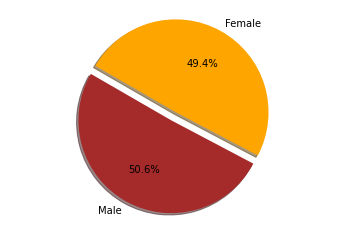

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
counts = [958, 935]
colors = ["brown", "orange"]
explode = (0.1, 0)
plt.pie(counts, explode = explode, labels = labels, colors = colors,
       autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
combined_dataset

capomulin_df = combined_dataset.loc[combined_dataset["Drug Regimen"] == "Capomulin",:]
ramicane_df = combined_dataset.loc[combined_dataset["Drug Regimen"] == "Ramicane",:]
infubinol_df = combined_dataset.loc[combined_dataset["Drug Regimen"] == "Infubinol",:]
ceftamin_df = combined_dataset.loc[combined_dataset["Drug Regimen"] == "Ceftamin", :]

In [48]:
# Capomulin - Group by mouse ID and use max to find maximum timepoint for each mouse.
capomulin_max = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_max)

# Merge data into DataFrame
capomulin_merge = pd.merge(capomulin_vol, combined_dataset, on=("Mouse ID", "Timepoint"),how="left")
capomulin_merge.head()

# Tumor Volume
tumor_capomulin = capomulin_merge["Tumor Volume (mm3)"]

# Define quartiles, IQR, lower and upper quartiles
quartiles = tumor_capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"For Capomoulin treatment:")
print(f"The upper quartile of tumor volume is: {upperq}.")
print(f"The lower quartile of tumor volume is: {lowerq}.")
print(f"The interquartile range of tumor volume is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

For Capomoulin treatment:
The upper quartile of tumor volume is: 40.1592203.
The lower quartile of tumor volume is: 32.37735684.
The interquartile range of tumor volume is: 7.781863460000004.
The median of tumor volume is: 38.1251644.
Values above 51.83201549 could be outliers.
Values below 20.70456164999999 could be outliers.


In [49]:
# Ramicane - Group by mouse ID and use max to find maximum timepoint for each mouse.
ramicane_max = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_max)

# Merge data into DataFrame
ramicane_merge = pd.merge(ramicane_vol, combined_dataset, on=("Mouse ID", "Timepoint"),how="left")
ramicane_merge.head()

# Ramicane - Tumor Volume
tumor_ramicane = ramicane_merge["Tumor Volume (mm3)"]

# Define quartiles, IQR, lower and upper quartiles
quartiles = tumor_ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"For Ramicane treatment:")
print(f"The upper quartile of tumor volume is: {upperq}.")
print(f"The lower quartile of tumor volume is: {lowerq}.")
print(f"The interquartile range of tumor volume is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

For Ramicane treatment:
The upper quartile of tumor volume is: 40.65900627.
The lower quartile of tumor volume is: 31.56046955.
The interquartile range of tumor volume is: 9.098536719999998.
The median of tumor volume is: 36.56165229.
Values above 54.30681135 could be outliers.
Values below 17.912664470000003 could be outliers.


In [50]:
# Infubinol - Group by mouse ID and use max to find maximum timepoint for each mouse.
infubinol_max = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_max)

# Merge data into DataFrame
infubinol_merge = pd.merge(infubinol_vol, combined_dataset, on=("Mouse ID", "Timepoint"),how="left")
infubinol_merge.head()

# Infubinol - Tumor Volume
tumor_infubinol = infubinol_merge["Tumor Volume (mm3)"]

# Define quartiles, IQR, lower and upper quartiles
quartiles = tumor_infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"For Infubinol treatment:")
print(f"The upper quartile of tumor volume is: {upperq}.")
print(f"The lower quartile of tumor volume is: {lowerq}.")
print(f"The interquartile range of tumor volume is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

For Infubinol treatment:
The upper quartile of tumor volume is: 65.52574285.
The lower quartile of tumor volume is: 54.04860769.
The interquartile range of tumor volume is: 11.477135160000003.
The median of tumor volume is: 60.16518046.
Values above 82.74144559000001 could be outliers.
Values below 36.83290494999999 could be outliers.


In [51]:
# Ceftamin - Group by mouse ID and use max to find maximum timepoint for each mouse.
ceftamin_max = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_max)

# Merge data into DataFrame
ceftamin_merge = pd.merge(ceftamin_vol, combined_dataset, on=("Mouse ID", "Timepoint"),how="left")
ceftamin_merge.head()

# Ceftamin - Tumor Volume
tumor_ceftamin = ceftamin_merge["Tumor Volume (mm3)"]

# Define quartiles, IQR, lower and upper quartiles
quartiles = tumor_ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"For Ceftamin treatment:")
print(f"The upper quartile of tumor volume is: {upperq}.")
print(f"The lower quartile of tumor volume is: {lowerq}.")
print(f"The interquartile range of tumor volme is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

For Ceftamin treatment:
The upper quartile of tumor volume is: 64.29983003.
The lower quartile of tumor volume is: 48.72207785.
The interquartile range of tumor volme is: 15.577752179999997.
The median of tumor volume is: 59.85195552.
Values above 87.66645829999999 could be outliers.
Values below 25.355449580000002 could be outliers.


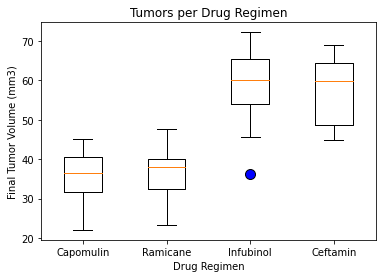

In [52]:
# Box plot for 4 main treatments

box_plot_regimen = [tumor_ramicane, tumor_capomulin, tumor_infubinol, tumor_ceftamin]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors per Drug Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')

outlier_dot = dict(markerfacecolor='blue',markersize=10)

ax1.boxplot(box_plot_regimen, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",],flierprops=outlier_dot)

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

In [53]:
# Line plot of tumor volume vs. time point for a mouse treated w/ Capomoulin

capomulin_df = combined_dataset.loc[combined_dataset["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


Text(0.5, 1.0, 'Tumor Volume vs. Timepoint of Mouse s185 treated with capomoulin')

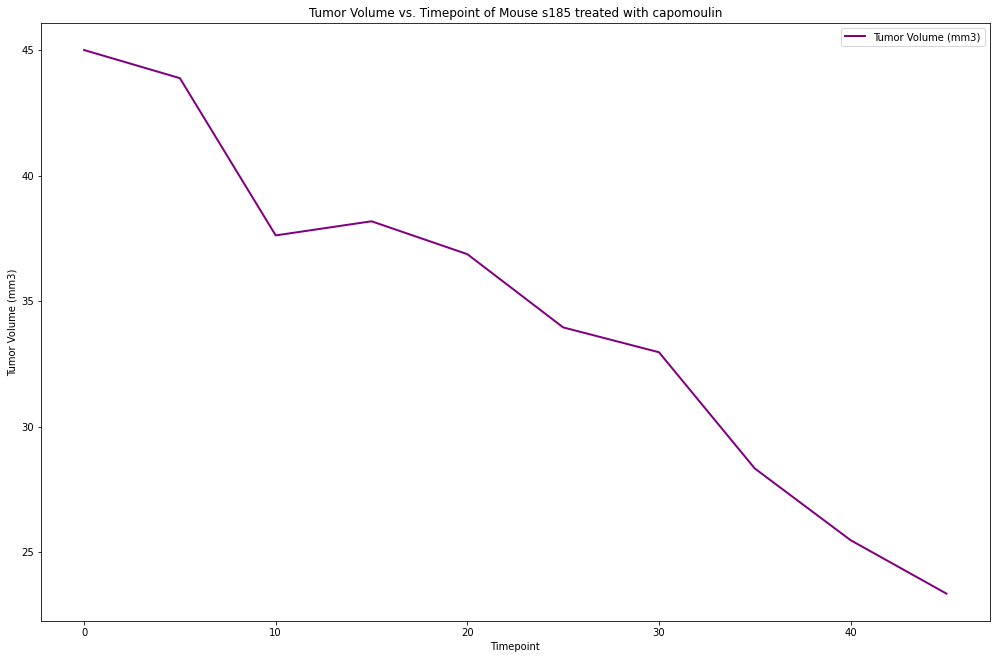

In [54]:
# Isolate data of a single mouse (s185) w/ capomoulin

capomulin_s185_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capomulin_s185_df.head()

# Columns and index of single mouse (s185)
capomulin_s185_df = capomulin_s185_df.loc[:,["Timepoint", "Tumor Volume (mm3)"]]
capomulin_s185_df = capomulin_s185_df.reset_index(drop=True)

# Generate a line plot of time point versus tumor volume for a mouse (s185) treated with Capomulin
capomulin_s185_df.set_index('Timepoint').plot(figsize=(17,11), linewidth=2, color='purple')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Tumor Volume vs. Timepoint of Mouse s185 treated with capomoulin")

In [55]:
# Scatter Plot of average tumor volume versus mouse weight


# Isolate Capomulin Drug Regimen data from above
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


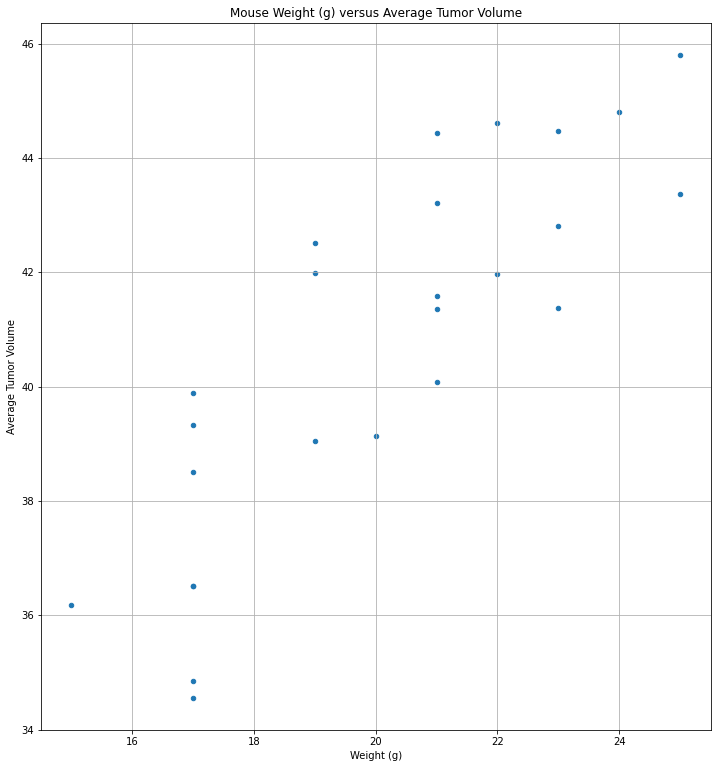

In [56]:
# Take specific colums from Capomoulin dataset
capomulin_filtered_df = capomulin_df.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_filtered_df.head()

# Average tumor volume per mouse and weight
capomulin_mean = pd.DataFrame(capomulin_filtered_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

# Change Tumor Volume column name to average tumor volume
capomulin_mean = capomulin_mean.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
capomulin_mean.head()

# Display mean scatter plot

capomulin_mean.plot(kind = "scatter", x="Weight (g)", y="Average Tumor Volume", grid=True, figsize=(12,13), 
                    title="Mouse Weight (g) versus Average Tumor Volume")
plt.show()

## Correlation and Regression

In [61]:
# Define dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd

capomulin_mean

mice_weight = capomulin_mean.iloc[:,0]
avg_tumorvolume = capomulin_mean.iloc[:,1]

# Calculate the correlation coefficient
correlation = st.pearsonr(mice_weight,avg_tumorvolume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}.")

# Linear Regression dividing
x_values = capomulin_mean['Weight (g)']
y_values = capomulin_mean['Average Tumor Volume']
plt.scatter(x_values,y_values)
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.title("Mouse Weight (g) versus Average Tumor Volume")
plt.show()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

Predicted y is 42.54983369121531 versus value of 41.963635634
The r-squared is: 1.6838726849389436


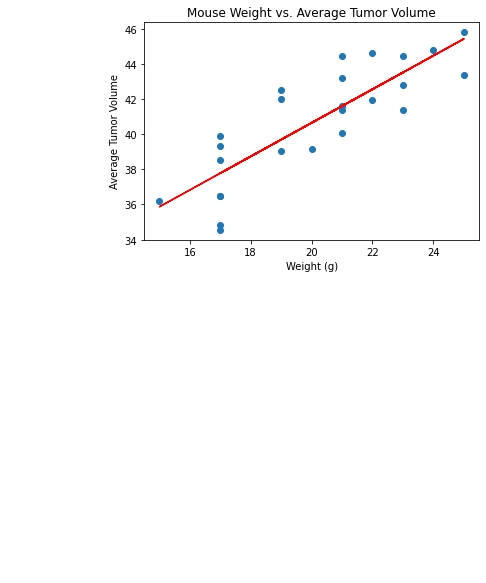

In [58]:
# Linear Regression equation and plot it 
x_values = capomulin_mean['Weight (g)']
y_values = capomulin_mean['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

y=slope*x_values[0]+intercept
print(f'Predicted y is {y} versus value of {y_values[0]}')

# Calculate regression values and R-squared 
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=10,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title("Mouse Weight vs. Average Tumor Volume")
print(f"The r-squared is: {rvalue*2}")
plt.show()